In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plot_acc_with_ax(ax,history):
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plot_loss_with_ax(ax, history):
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('model loss')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    
def class_acc(cm):
    class_acc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return class_acc.diagonal()


# Ablation study
Termin *ablation study* pochodzi z dziedziny nauk neurobiologii. Było to doświadczenie polegające na uszkadzaniu fragmentu mózgu zwierzęcia i obserwacji zmian w późniejszym zachowaniu. Pozwala to wywnioskować, za jakie funkcje odpowiadają dane cześći mózgu.

W dziedzinie uczenia maszynowego, *ablation study* analogicznie polega na usunięciu fragmentu sieci neuronowej i przeanalizowaniu zmiany działania i wydajności sieci.

Poniżej przedstawimy przykładowe *ablation study* na sieci konwolucujnej dokonującej klasyfikacji na zbiorze danych MNIST. Problem klasyfikacji wieloklasowej pozwala podzielić błędy na ich rodzaje (macierz pomyłek), co pozwala rozbić wydajność sieci na wiele aspektów, w przeciwiństwie do problemu regresji gdzie zmianę działania modelu można zaobserwować tylko w formie większy/mniejszy błąd.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

## Stworzenie bazowego modelu
Tworzymy prosty, poprawnie działający model CNN jako punkt wyjściowy.

In [4]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                32784     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 33,274
Trainable params: 33,274
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save_weights('initialized_weights.h5')
history_original = model.fit(x_train, y_train, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 13s 8ms/step - loss: 0.6440 - accuracy: 0.8062 - val_loss: 0.1253 - val_accuracy: 0.9661
Epoch 2/10
1594/1594 [==============================] - 10s 7ms/step - loss: 0.1247 - accuracy: 0.9636 - val_loss: 0.0903 - val_accuracy: 0.9737
Epoch 3/10
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0748 - val_accuracy: 0.9794
Epoch 4/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0862 - val_accuracy: 0.9741
Epoch 5/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0609 - val_accuracy: 0.9839
Epoch 6/10
1594/1594 [==============================] - 10s 7ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0635 - val_accuracy: 0.9819
Epoch 7/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0546 - val_ac

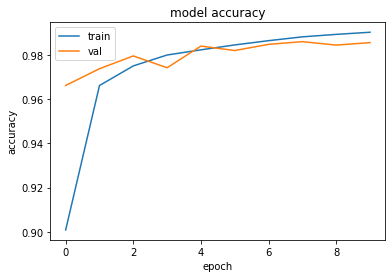

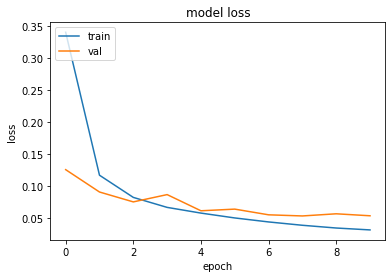

In [6]:
plot_acc(history_original)
plot_loss(history_original)

In [7]:
from sklearn.metrics import confusion_matrix
from copy import deepcopy
#model.save('working_model.h5')
#model = keras.models.load_model('working_model.h5')
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm_original = confusion_matrix(y_test, y_pred)
cm_mistakes_original = cm_original.copy()
y_pred_original = y_pred
np.fill_diagonal(cm_mistakes_original, 0)

#model.save_weights('working_weights.h5')

Model na zbiorze testowym osiąga 98.4% dokładności. Poniżej przedstawiona jest macierz pomyłek z wyzerowaną przekątną aby wyraźniej było widać rodzaje popełnionych błędów.

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9833


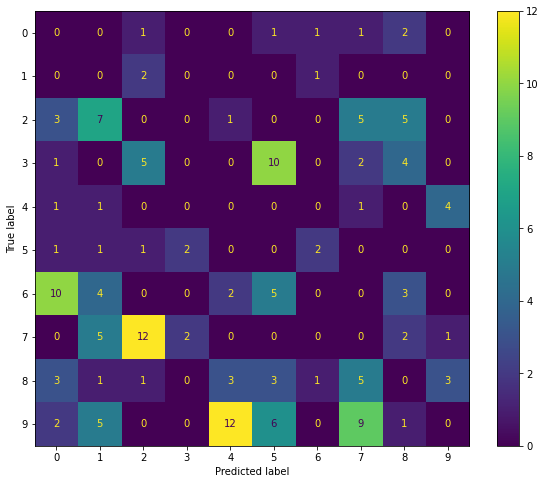

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm_mistakes_original)
disp.plot()
disp.figure_.set_size_inches(10,8)
plt.show()

In [10]:
# dokładność dla każdej z klas
list(zip(range(10), list(class_acc(cm_original))))

[(0, 0.9938775510204082),
 (1, 0.9973568281938326),
 (2, 0.9796511627906976),
 (3, 0.9782178217821782),
 (4, 0.9928716904276986),
 (5, 0.992152466367713),
 (6, 0.9749478079331941),
 (7, 0.9785992217898832),
 (8, 0.9794661190965093),
 (9, 0.9653121902874133)]

## Zmiana learning rate
Domyślną wartością `learning rate` dla wykorzystanego optymalizatora jest `0.001`. Sprawdźmy jak zmieni się działanie sieci po zmianie tej wartości na `0.1`

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights('initialized_weights.h5')
history = model.fit(x_train, y_train, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 10s 6ms/step - loss: 2.3663 - accuracy: 0.1055 - val_loss: 2.3156 - val_accuracy: 0.0916
Epoch 2/10
1594/1594 [==============================] - 11s 7ms/step - loss: 2.3153 - accuracy: 0.0995 - val_loss: 2.3242 - val_accuracy: 0.1002
Epoch 3/10
1594/1594 [==============================] - 11s 7ms/step - loss: 2.3128 - accuracy: 0.1055 - val_loss: 2.3102 - val_accuracy: 0.1093
Epoch 4/10
1594/1594 [==============================] - 11s 7ms/step - loss: 2.3144 - accuracy: 0.1055 - val_loss: 2.3262 - val_accuracy: 0.1028
Epoch 5/10
1594/1594 [==============================] - 10s 6ms/step - loss: 2.3147 - accuracy: 0.1044 - val_loss: 2.3073 - val_accuracy: 0.1063
Epoch 6/10
1594/1594 [==============================] - 9s 6ms/step - loss: 2.3139 - accuracy: 0.1021 - val_loss: 2.3078 - val_accuracy: 0.1002
Epoch 7/10
1594/1594 [==============================] - 11s 7ms/step - loss: 2.3142 - accuracy: 0.1023 - val_loss: 2.3177 - val_acc

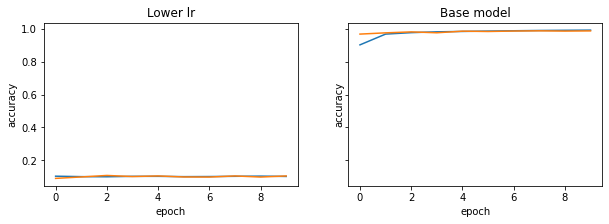

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10,3)
plot_acc_with_ax(axs[0], history)
axs[0].title.set_text('Lower lr')
plot_acc_with_ax(axs[1], history_original)
axs[1].title.set_text('Base model')

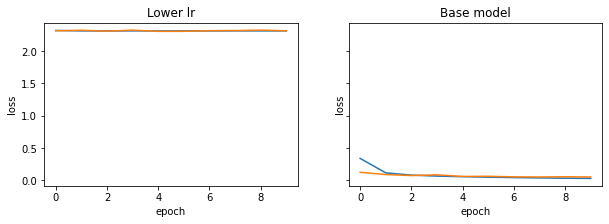

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10,3)
plot_loss_with_ax(axs[0], history)
axs[0].title.set_text('Lower lr')
plot_loss_with_ax(axs[1], history_original)
axs[1].title.set_text('Base model')

Model radzi sobie znacznie gorzej, jest to zbyt duża wartość `lr`.

In [14]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(accuracy_score(y_test, y_pred))

0.1135


## Usuwanie fragmentu sieci
Wyłączmy jeden z 16 neuronów warstwy `Dense`. Zrobimy to za pomocą wyzerowania jego wag, wtedy taki neuron przestanie mieć wpływ na wynik klasyfikacji. Dzięki temu zachowujemy budowę i wagi reszty sieci.

In [15]:
# lista sieci
model.layers

In [16]:
def plot_changes(y_pred, **kwargs):
    print("Accuracy po usunieciu: ", accuracy_score(y_test, y_pred))
    print("Accuracy przed usunieciem: ", accuracy_score(y_test, y_pred_original))
    cm = confusion_matrix(y_pred, y_test)
    cm_mistakes = cm.copy()
    np.fill_diagonal(cm_mistakes, 0)
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(cm_mistakes-cm_mistakes_original, annot=True, fmt='g', **kwargs)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    acc_comparison = np.array([class_acc(cm_original), class_acc(cm)]).T
    pd.DataFrame(acc_comparison, columns=['base', 'ablated']).plot(kind='bar')
    
# funkcja do liczenia dokladnosci dla kazdej klasy osobno
def plot_cm(cm):
    disp = ConfusionMatrixDisplay(cm_mistakes-cm_mistakes_original)
    disp.plot()

Usuwamy drugi neuron z warstwy gęstej.

In [17]:
model.load_weights('working_weights.h5')
weights = deepcopy(model.layers[3].get_weights())
weights[0][:, 0] = 0
weights[1][0] = 0
model.layers[3].set_weights(weights)

Po wyłączeniu pierwsze neuronu sprawdzamy działanie sieci na zbiorze testowym. Rysujemy również macierz która jest różnicą macierzy pomyłek sieci po wyłączeniu neuronu oraz macierzy pomyłek sieci bazowej. Dzięki temu widzimy różnicę popełnianych błędów. Dodatnie wartości oznaczają więcej popełnionych błędów danego typu, ujemnie - mniej błędów niż model bazowy.

Wyłączenie pierwszego neuronu miało niezauważalny wpływ na działanie sieci, różnica dotyczyła klasyfikacji niewielu przykładów, utrzymująć całościowy wynik dokładności 98.4%.

Accuracy po usunieciu:  0.9841
Accuracy przed usunieciem:  0.9833


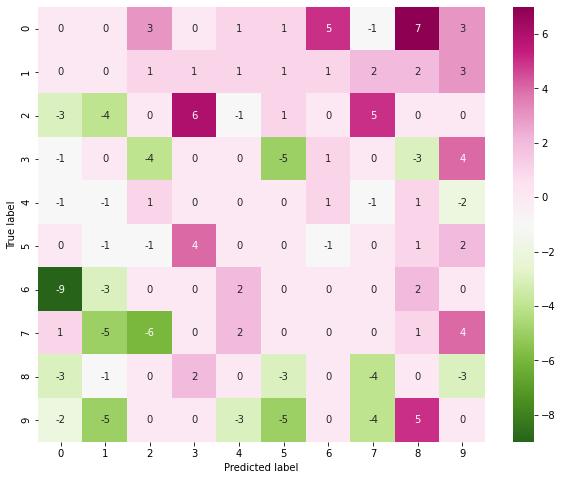

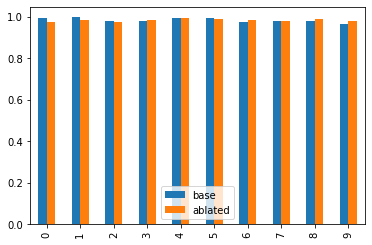

In [18]:
# wynik sieci po usunieciu pierwszego neuronu
y_pred = np.argmax(model.predict(x_test), axis=-1)
plot_changes(y_pred, cmap='PiYG_r')

Natomiast w przypadku neuronu czwartego z warstwy `Dense`, jego wyłączenie znacząco wpływa na działanie sieci. Całościowa dokładnośc modelu spadła do 85.3%, natomiast dla klas '2' i '3 aż do około 60%.  Na macierzy pomyłek widać że ten neuron odpowiadał za rozróżnianie cyfr '3' od '5' oraz '2' i '3' od '8'.

Accuracy po usunieciu:  0.8527
Accuracy przed usunieciem:  0.9833


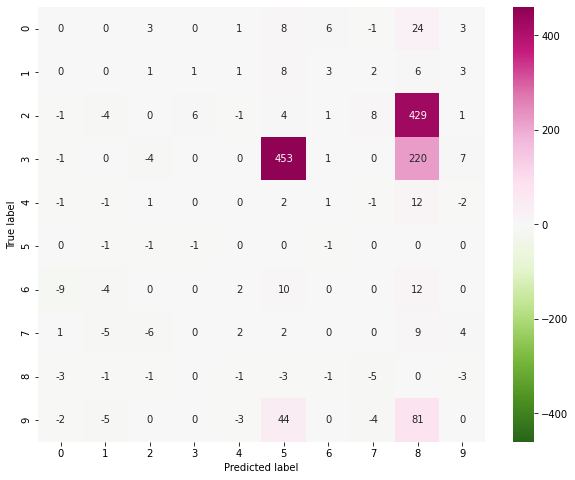

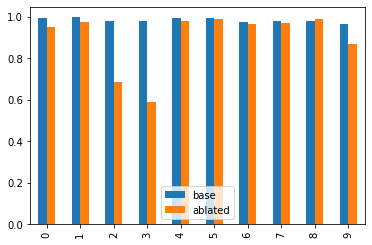

In [19]:
model.load_weights('working_weights.h5')
weights = deepcopy(model.layers[3].get_weights())
weights[0][:, 3] = 0
weights[1][3] = 0

model.layers[3].set_weights(weights)
y_pred = np.argmax(model.predict(x_test), axis=-1)
plot_changes(y_pred, cmap='PiYG_r', vmax=460, vmin=-460)

Sprawdźmy teraz skutki usunięcia dla każdego neuronu z warstw `Dense`.

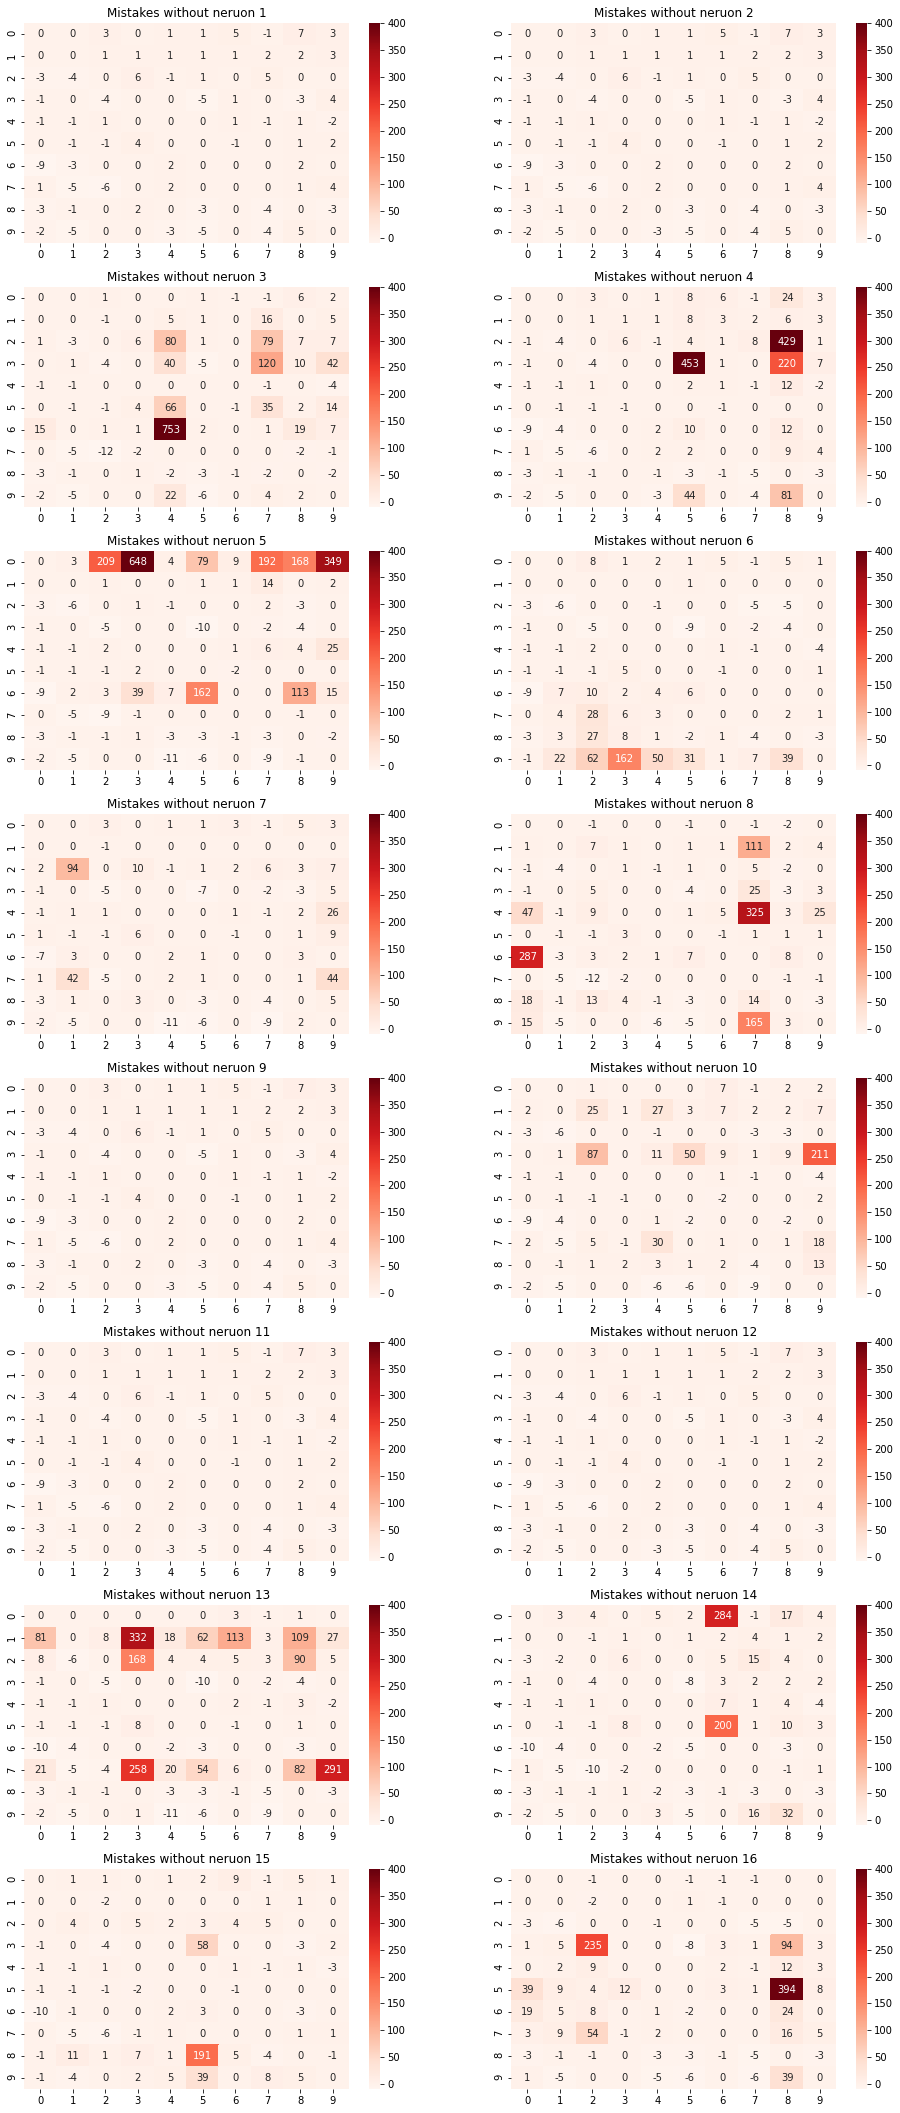

In [20]:
fig, axs = plt.subplots(8,2)
fig.set_size_inches(16,38)
for i in range(8):
    for j in range(2):
        model.load_weights('working_weights.h5')
        weights = deepcopy(model.layers[3].get_weights())
        weights[0][:, 2*i + j] = 0
        weights[1][2*i + j] = 0
        model.layers[3].set_weights(weights)
        y_pred = np.argmax(model.predict(x_test), axis=-1)
        cm = confusion_matrix(y_pred, y_test)
        cm_mistakes = cm.copy()
        np.fill_diagonal(cm_mistakes, 0)
        sns.heatmap(cm_mistakes-cm_mistakes_original, ax=axs[i,j], cmap='Reds', vmax=400, vmin=-9, annot=True, fmt='g')
        axs[i,j].title.set_text('Mistakes without neruon '+ str(2*i + j + 1))

Po przeanalizowaniu można wywnioskować że 5 z 16 neronów w warswite `Dense` nie odgrywa znaczącej roli w klasyfikacji. W przypadku każdego neuronu, po jego usunięciu model popełniał nieco mniej błędów dla pewnych klas jednak w większości przypadków była to zbyt mała poprawa w porównaniu do większej liczby popełnionych błędów dla innych klas (np. po wyłączeniu 16. neuronu, model popełnił o 33 błędów mniej w rozpoznawaniu cyfry '8', jednak jest to niewspółmierne do pomylenia piątek z ósemką prawie o 400 więcej)

## Usuwanie filtra operacji konwolucji
Przeprowadźmy analogiczną analizę dla filtrów z warstwy konwolucyjnej, sprawdzimy 16 z 32 filtrów.

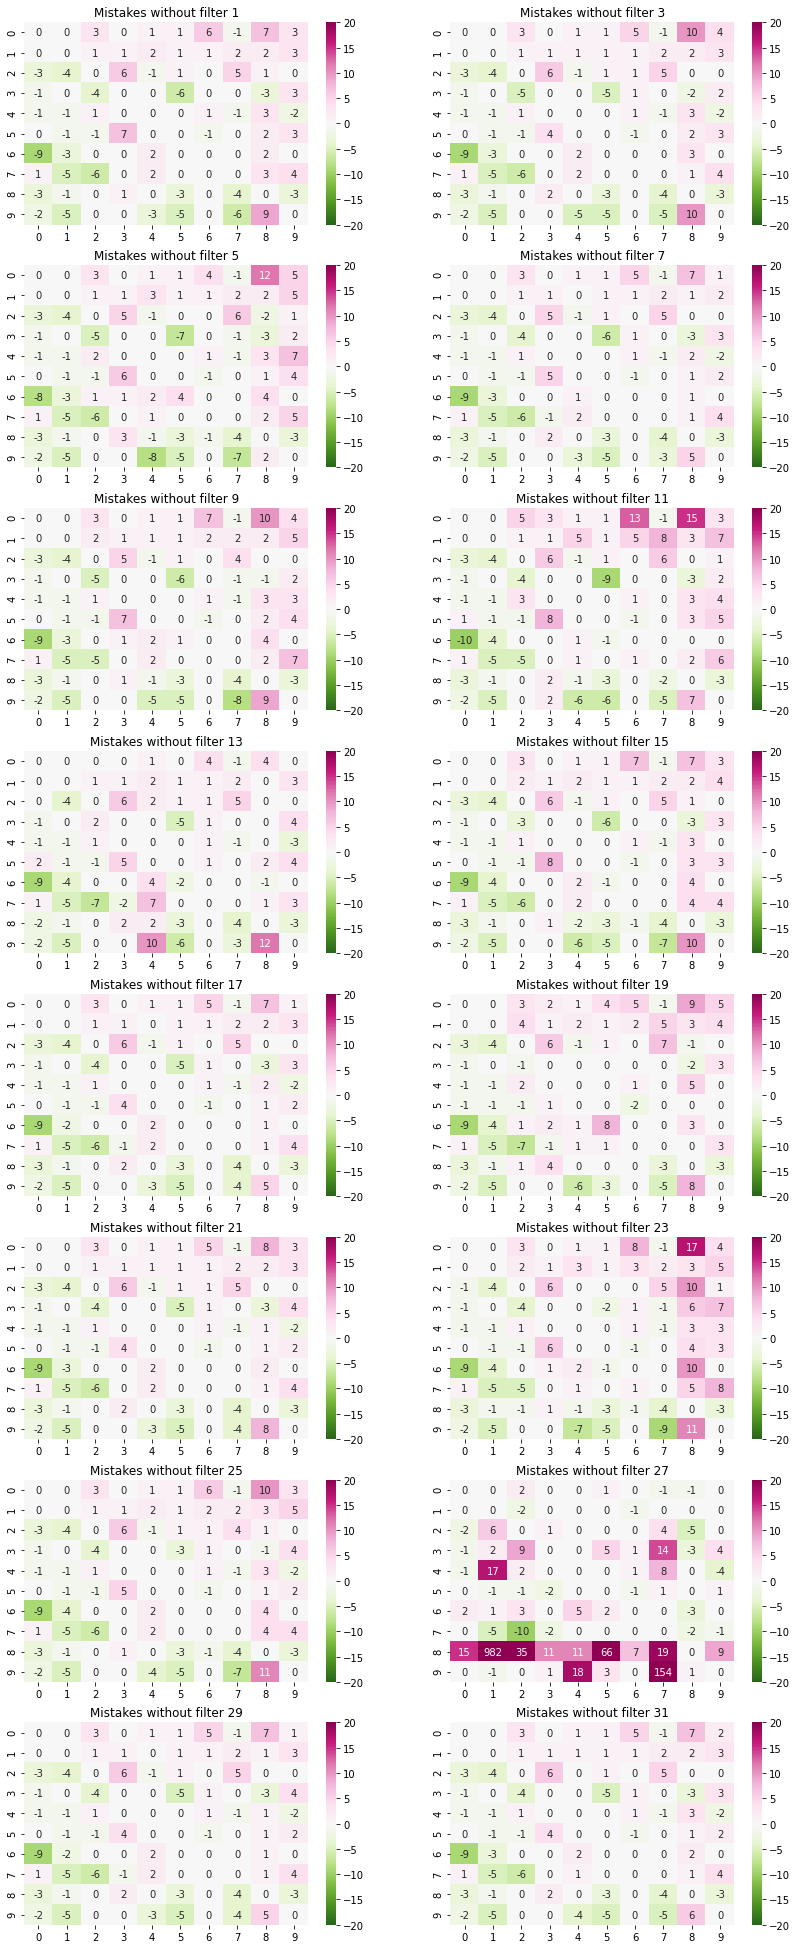

In [22]:
fig, axs = plt.subplots(8,2)
fig.set_size_inches(14,35)
for i in range(8):
    for j in range(2):
        model.load_weights('working_weights.h5')
        weights = deepcopy(model.layers[0].get_weights())
        weights[0][:,:,:, 4*i + j*2] = 0
        weights[1][4*i + j*2] = 0
        model.layers[0].set_weights(weights)
        y_pred = np.argmax(model.predict(x_test), axis=-1)
        cm = confusion_matrix(y_pred, y_test)
        cm_mistakes = cm.copy()
        np.fill_diagonal(cm_mistakes, 0)
        sns.heatmap(cm_mistakes-cm_mistakes_original, ax=axs[i,j], cmap='PiYG_r', annot=True, vmin=-20, vmax=20, fmt='g')
        axs[i,j].title.set_text('Mistakes without filter '+ str(4*i + j*2 + 1))

Na powyższych wykresach widać, że rola elementów w warstwie konwolucyjnej w klasyfikacji jest dużo bardziej równomiernie rozłożona. Zabranie każdego z filtrów sprawia że sieć w podobnym stopniu się pogorszy. W każdym przypadku jest to około 20-40 błędnych klasyfikacji więcej. Wyjątkiem jest filtr 27. który odgrywa kluczową rolę w rozpoznawaniu ósemek i dziewiątek. Co ciekawe, po zabraniu dowolnego filtra błędy mniej więcej się równoważą się (w porównaniu do warstwy `Dense`, gdzie zdecydowanie więcej było pogorszenia niż poprawy po zabraniu neurona), tzn. jeśli popełniono więcej błędów dla pewnych klas, to dla innych klas popełniono mniej błędów. 